In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

/users/maaqib/.conda/envs/tf-gpu/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd

# Load the modified dataset
df = pd.read_csv('cic_0_modified.csv')

# Check the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [6]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Assuming the label column is named 'label', otherwise, change it to the correct column name
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi2, selecting the top 12 features
selector = SelectKBest(chi2, k=12)  # Ensure k is an integer
X_new = selector.fit_transform(X_train, y_train)

# Get the selected features and their scores
feature_scores = pd.DataFrame({'Feature': X.columns[selector.get_support()], 'Score': selector.scores_[selector.get_support()]})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores)

# Optionally, save the selected features to a CSV file
feature_scores.to_csv('selected_features_scores.csv', index=False)


          Feature         Score
11     Covariance  6.343042e+10
0   Header_Length  4.941344e+10
4       rst_count  1.230366e+08
5         Tot sum  9.407826e+07
6             Max  5.921074e+07
10         Radius  4.116315e+07
8             Std  2.916654e+07
1            Rate  2.758512e+07
2           Srate  2.758512e+07
9        Tot size  9.412373e+06
3       urg_count  9.278608e+06
7             AVG  9.167367e+06


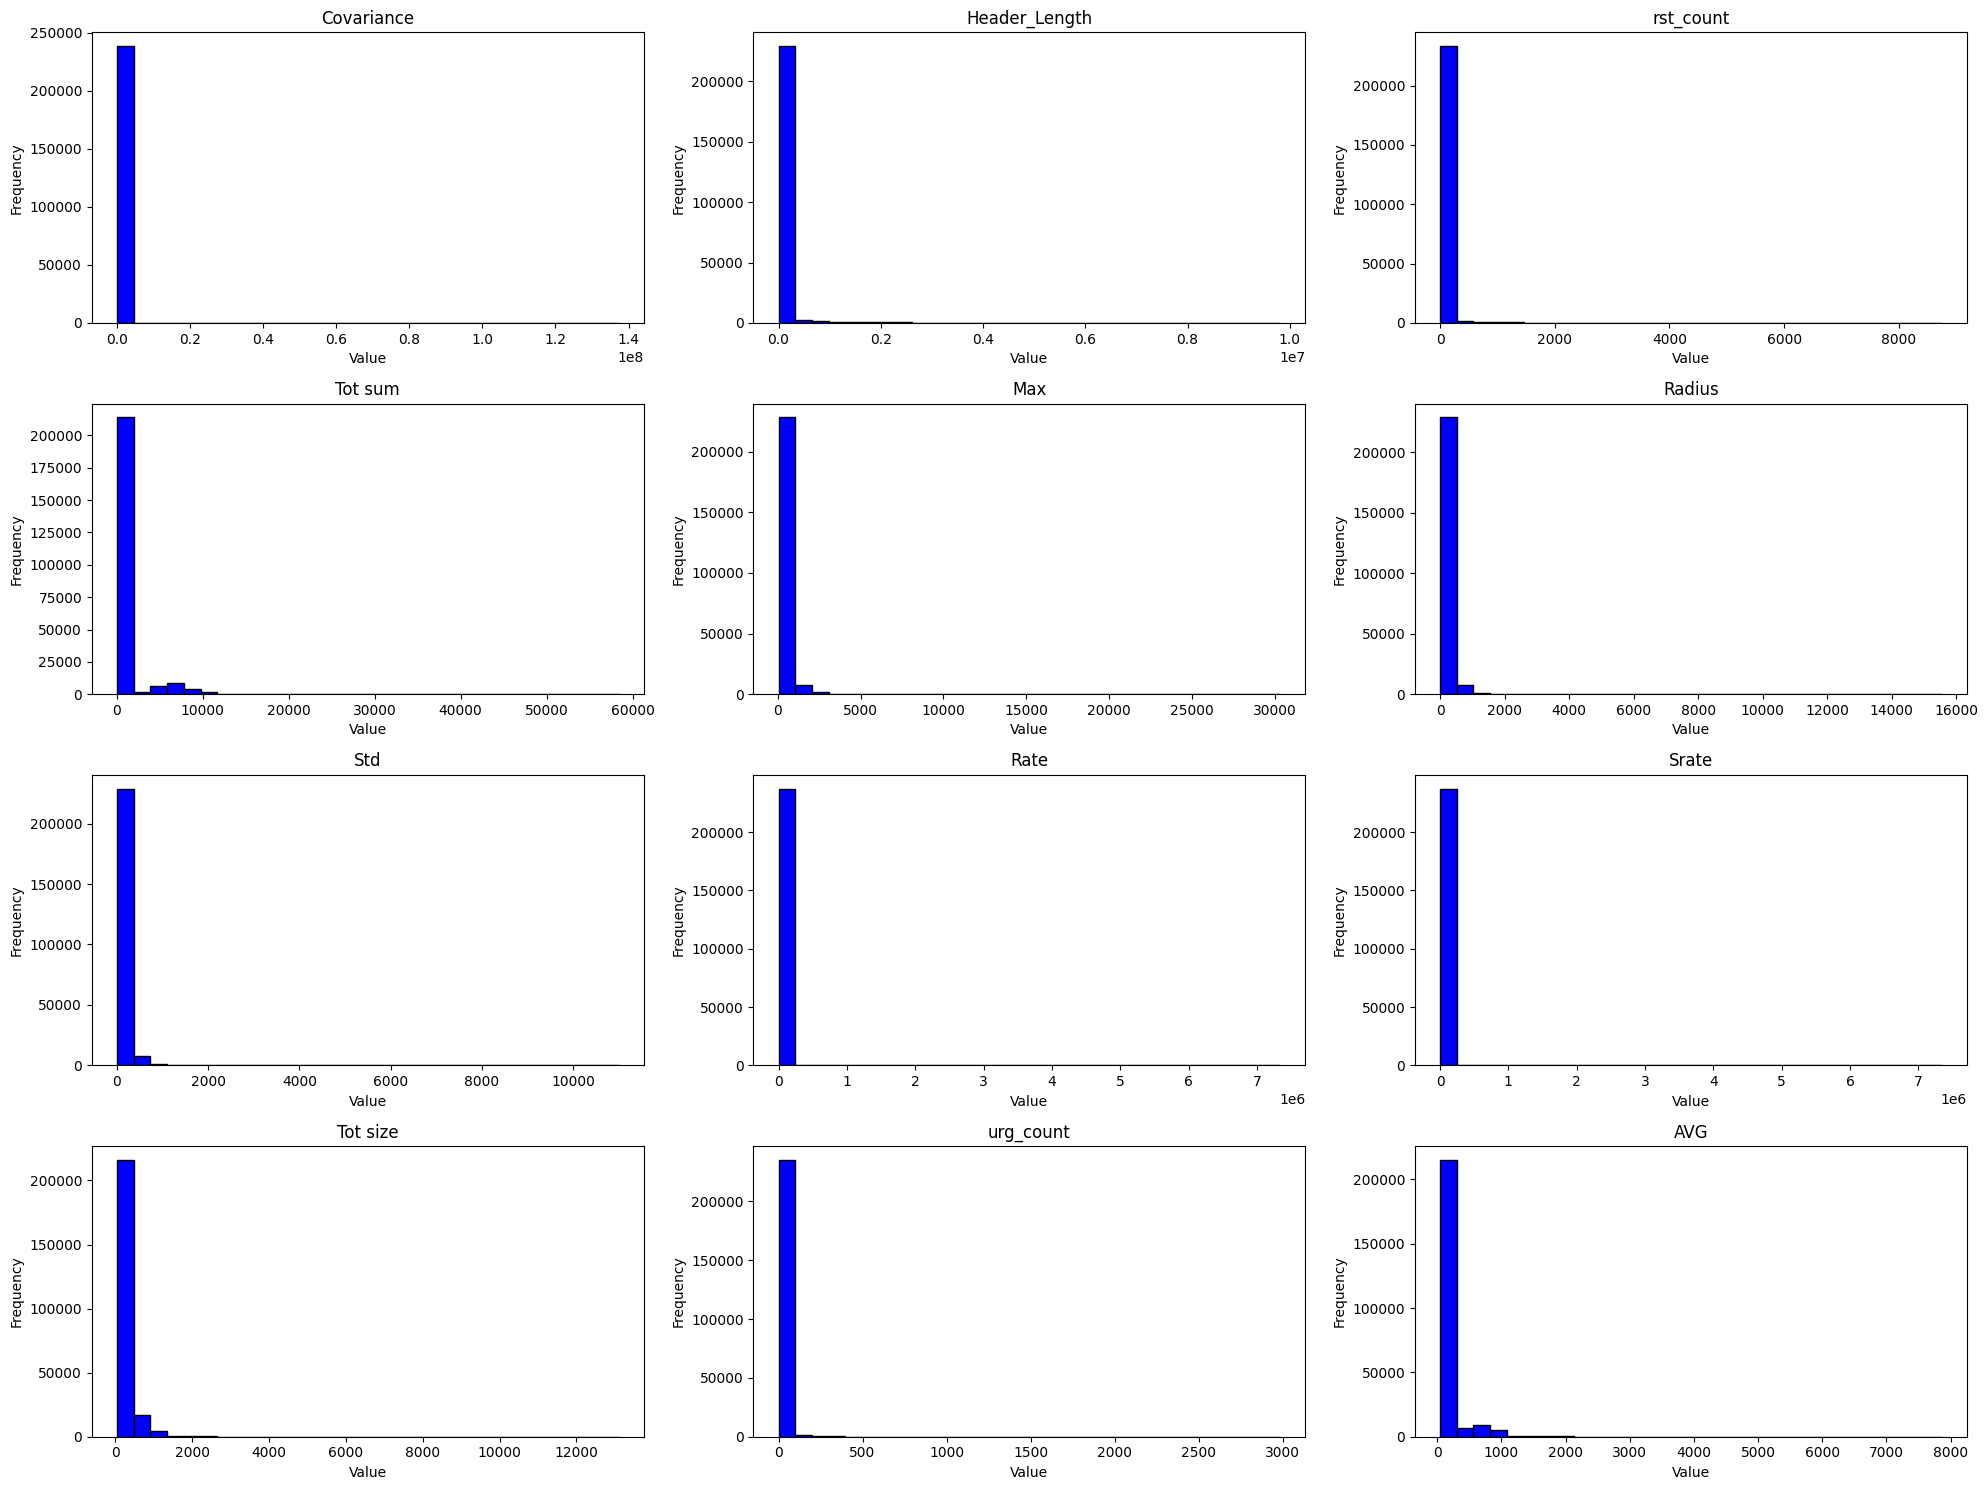

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Define the selected features
selected_features = [
    'Covariance', 
    'Header_Length', 
    'rst_count', 
    'Tot sum', 
    'Max', 
    'Radius', 
    'Std', 
    'Rate', 
    'Srate', 
    'Tot size', 
    'urg_count', 
    'AVG'
]

# Plot histograms for each selected feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 3, i + 1)
    plt.hist(df[feature], bins=30, color='blue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


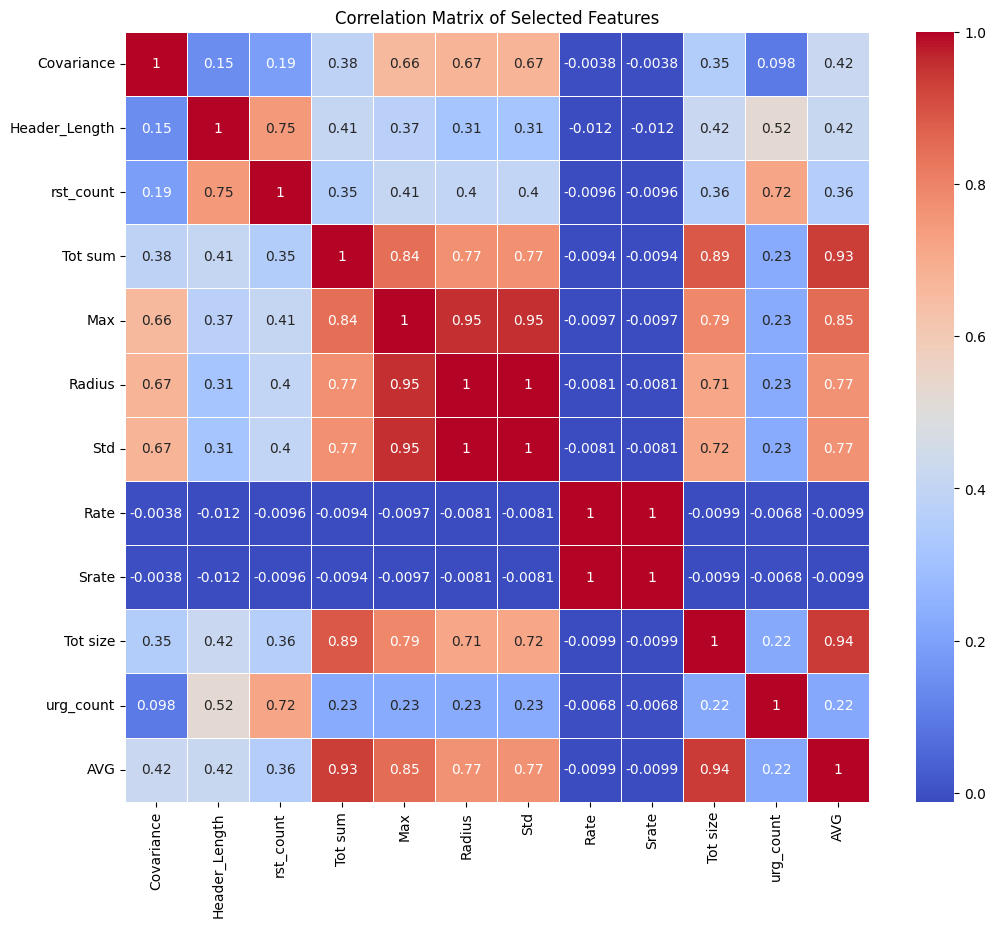

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Compute the correlation matrix
corr_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


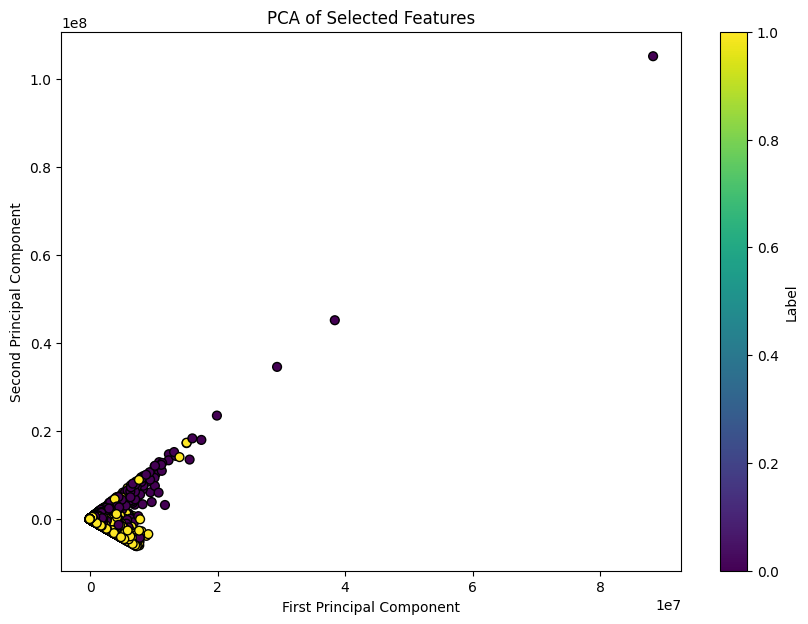

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Define X using selected features
X = df[selected_features]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Selected Features')
plt.colorbar(label='Label')
plt.show()


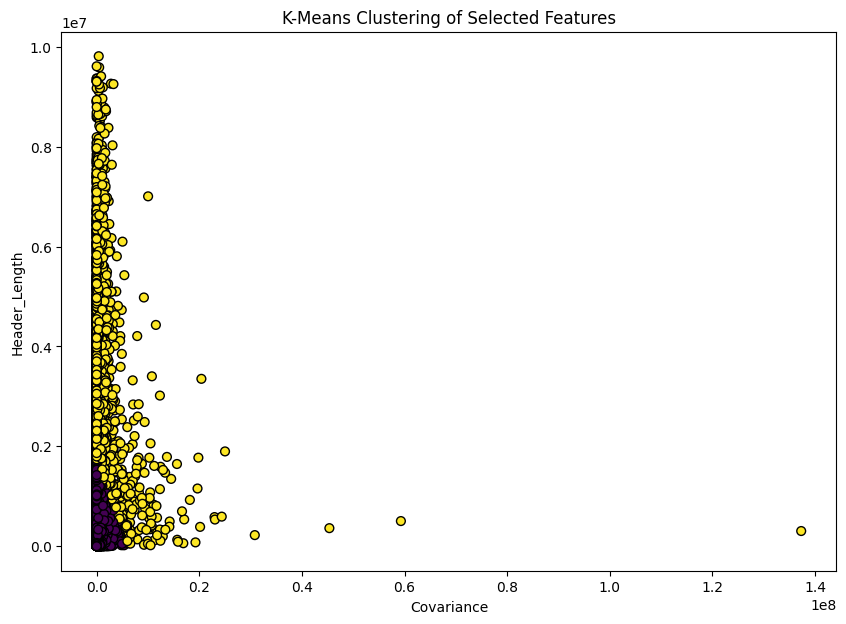

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Define X
X = df[selected_features]

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('K-Means Clustering of Selected Features')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Define the selected features
selected_features = [
    'Covariance', 
    'Header_Length', 
    'rst_count', 
    'Tot sum', 
    'Max', 
    'Radius', 
    'Std', 
    'Rate', 
    'Srate', 
    'Tot size', 
    'urg_count', 
    'AVG'
]

# Create the feature matrix X and the target variable y
X = df[selected_features]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1118
           1       1.00      1.00      1.00     46620

    accuracy                           0.99     47738
   macro avg       0.90      0.93      0.91     47738
weighted avg       0.99      0.99      0.99     47738



# Transfer Learning

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('cic_0_modified.csv')

# Define selected features and target variable
selected_features = [
    'Covariance', 
    'Header_Length', 
    'rst_count', 
    'Tot sum', 
    'Max', 
    'Radius', 
    'Std', 
    'Rate', 
    'Srate', 
    'Tot size', 
    'urg_count', 
    'AVG'
]

X = df[selected_features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model architecture (or load a pre-trained model)
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    return model

model = create_model(X_train.shape[1])

# Compile the model with a lower learning rate and proper loss function
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Introduce early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/20


/users/maaqib/.conda/envs/tf-gpu/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5968/5968 ━━━━━━━━━━━━━━━━━━━━ 6s 845us/step - accuracy: 0.9520 - loss: 0.2266 - val_accuracy: 0.9835 - val_loss: 0.0396
Epoch 2/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 797us/step - accuracy: 0.9818 - loss: 0.0481 - val_accuracy: 0.9843 - val_loss: 0.0349
Epoch 3/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 790us/step - accuracy: 0.9837 - loss: 0.0399 - val_accuracy: 0.9857 - val_loss: 0.0326
Epoch 4/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 791us/step - accuracy: 0.9849 - loss: 0.0371 - val_accuracy: 0.9881 - val_loss: 0.0305
Epoch 5/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 793us/step - accuracy: 0.9860 - loss: 0.0331 - val_accuracy: 0.9882 - val_loss: 0.0289
Epoch 6/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 806us/step - accuracy: 0.9872 - loss: 0.0321 - val_accuracy: 0.9883 - val_loss: 0.0278
Epoch 7/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 785us/step - accuracy: 0.9869 - loss: 0.0313 - val_accuracy: 0.9886 - val_loss: 0.0267
Epoch 8/20
5968/5968 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - accuracy: 0.9872 - loss: 0.03

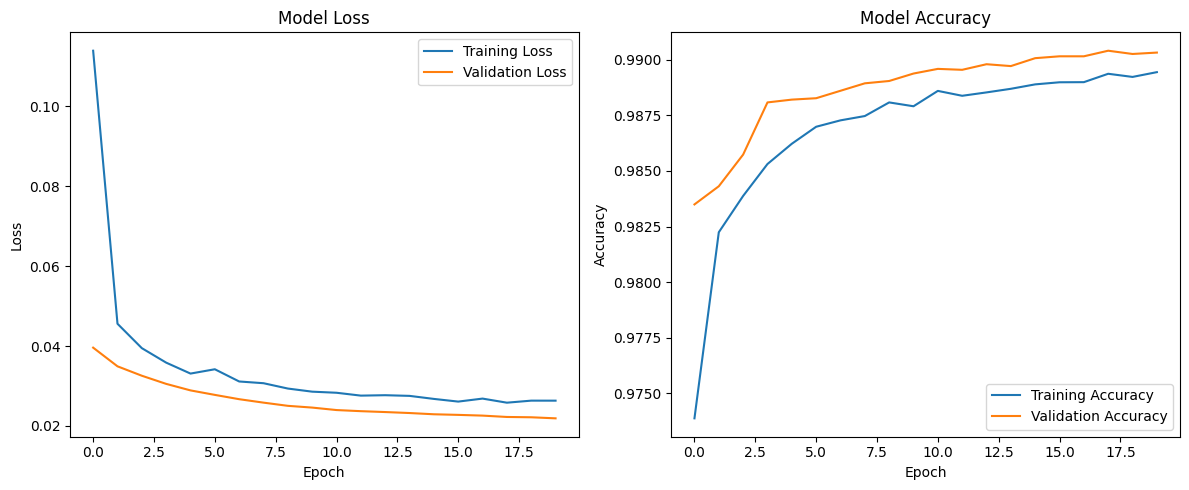

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()